### Round 1

Import the required libraries and modules that you would need.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.datasets import load_iris, load_breast_cancer
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree

Read that data into Python and call the dataframe churnData.


In [2]:
data = pd.read_csv("Data/DATA_Customer-Churn.csv")

In [3]:
churndata = pd.DataFrame(data)

Check the datatypes of all the columns in the data. You will see that the column TotalCharges is object type. Convert this column into numeric type using pd.to_numeric function.


In [4]:
churndata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   OnlineSecurity    7043 non-null   object 
 7   OnlineBackup      7043 non-null   object 
 8   DeviceProtection  7043 non-null   object 
 9   TechSupport       7043 non-null   object 
 10  StreamingTV       7043 non-null   object 
 11  StreamingMovies   7043 non-null   object 
 12  Contract          7043 non-null   object 
 13  MonthlyCharges    7043 non-null   float64
 14  TotalCharges      7043 non-null   object 
 15  Churn             7043 non-null   object 
dtypes: float64(1), int64(2), object(13)
memory

In [5]:
churndata['TotalCharges'] = pd.to_numeric(churndata['TotalCharges'], errors='coerce')

Check for null values in the dataframe. Replace the null values.


In [6]:
churndata.isnull().values.any()

True

In [7]:
mean_totalcharges=np.mean(churndata['TotalCharges'])
mean_totalcharges

2283.3004408418697

In [8]:
churndata['TotalCharges'].fillna(mean_totalcharges, inplace=True)

In [9]:
churndata.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Use the following features: tenure, SeniorCitizen, MonthlyCharges and TotalCharges:
 -  Split the data into a training set and a test set.
 -  Scale the features either by using normalizer or a standard scaler.
 -  (optional)Fit a logistic Regression model on the training data.
 -  Fit a Knn Classifier(NOT KnnRegressor please!)model on the training data.

In [10]:
x = churndata[['tenure', 'SeniorCitizen', 'MonthlyCharges', 'TotalCharges']]
y = churndata['Churn']

In [19]:
y = pd.get_dummies(y, drop_first=True)

In [20]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=11)


In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PowerTransformer
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

In [22]:
trans = PowerTransformer()

In [23]:
trans.fit(x_train)

x_train_mod = trans.transform(x_train)
x_test_mod  = trans.transform(x_test)

In [24]:
log_model = LogisticRegression() 

log_model.fit(x_train_mod, y_train)

y_pred_train_log = log_model.predict(x_train_mod)
y_pred_test_log = log_model.predict(x_test_mod)

C:\Users\migue\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [25]:
pd.DataFrame(y_pred_train_log).value_counts()

0    4647
1     987
dtype: int64

In [26]:
performance_log = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_log),
                                         precision_score(y_train, y_pred_train_log),
                                         recall_score(y_train, y_pred_train_log)],
                               'Test': [accuracy_score(y_test, y_pred_test_log),
                                        precision_score(y_test, y_pred_test_log),
                                        recall_score(y_test, y_pred_test_log)]})

,Error_metric,Train,Test
0,Accuracy,0.788782,0.801278
1,Precision,0.652482,0.699187
2,Recall,0.431925,0.455026


Confusion matrix for the train set
[[3800  343]
 [ 847  644]]


C:\Users\migue\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


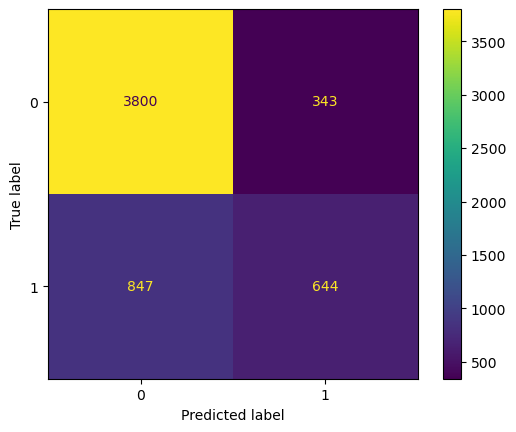



Confusion matrix for the test set
[[957  74]
 [206 172]]


C:\Users\migue\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


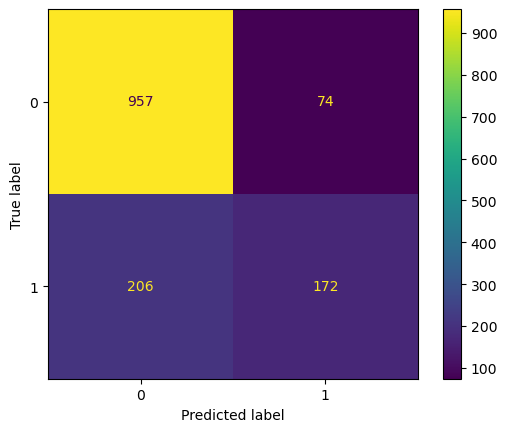

In [27]:
display(performance_log)

print("Confusion matrix for the train set")
print(confusion_matrix(y_train,y_pred_train_log))
plot_confusion_matrix(log_model,x_train_mod,y_train, values_format = 'd')
plt.show()

print()
print()

print("Confusion matrix for the test set")
print(confusion_matrix(y_test, y_pred_test_log))
plot_confusion_matrix(log_model,x_test_mod,y_test, values_format = 'd')
plt.show()

In [32]:
model_kn = KNeighborsClassifier(n_neighbors=1,weights='uniform') # declare we're using knn classification model
model_kn.fit(x_train, y_train) # train model
y_pred_kn = model_kn.predict(x_test) # predict test
y_pred_train_kn=model_kn.predict(x_train) # predict train (for sanity checks)
#model.predict_proba(inputdata)

C:\Users\migue\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\migue\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\migue\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\Users\migue\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\migue\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: Fu

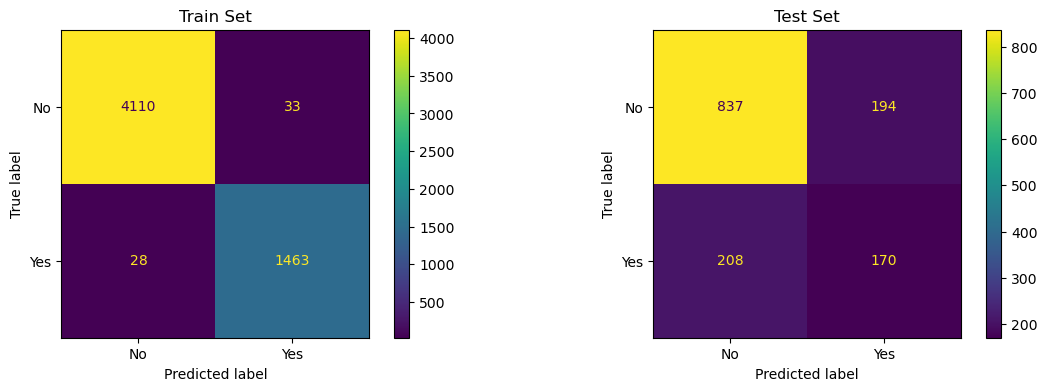

In [33]:
fig, ax = plt.subplots(1,2, figsize=(14,4))

plot_confusion_matrix(model_kn,x_train,y_train,ax=ax[0], values_format = 'd')
ax[0].title.set_text("Train Set")

plot_confusion_matrix(model_kn,x_test,y_test,ax=ax[1],values_format = 'd')
ax[1].title.set_text("Test Set")